In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline                   

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


dat = pd.read_excel('df.xslx.xls')
dat

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Exploratory Data Analysis

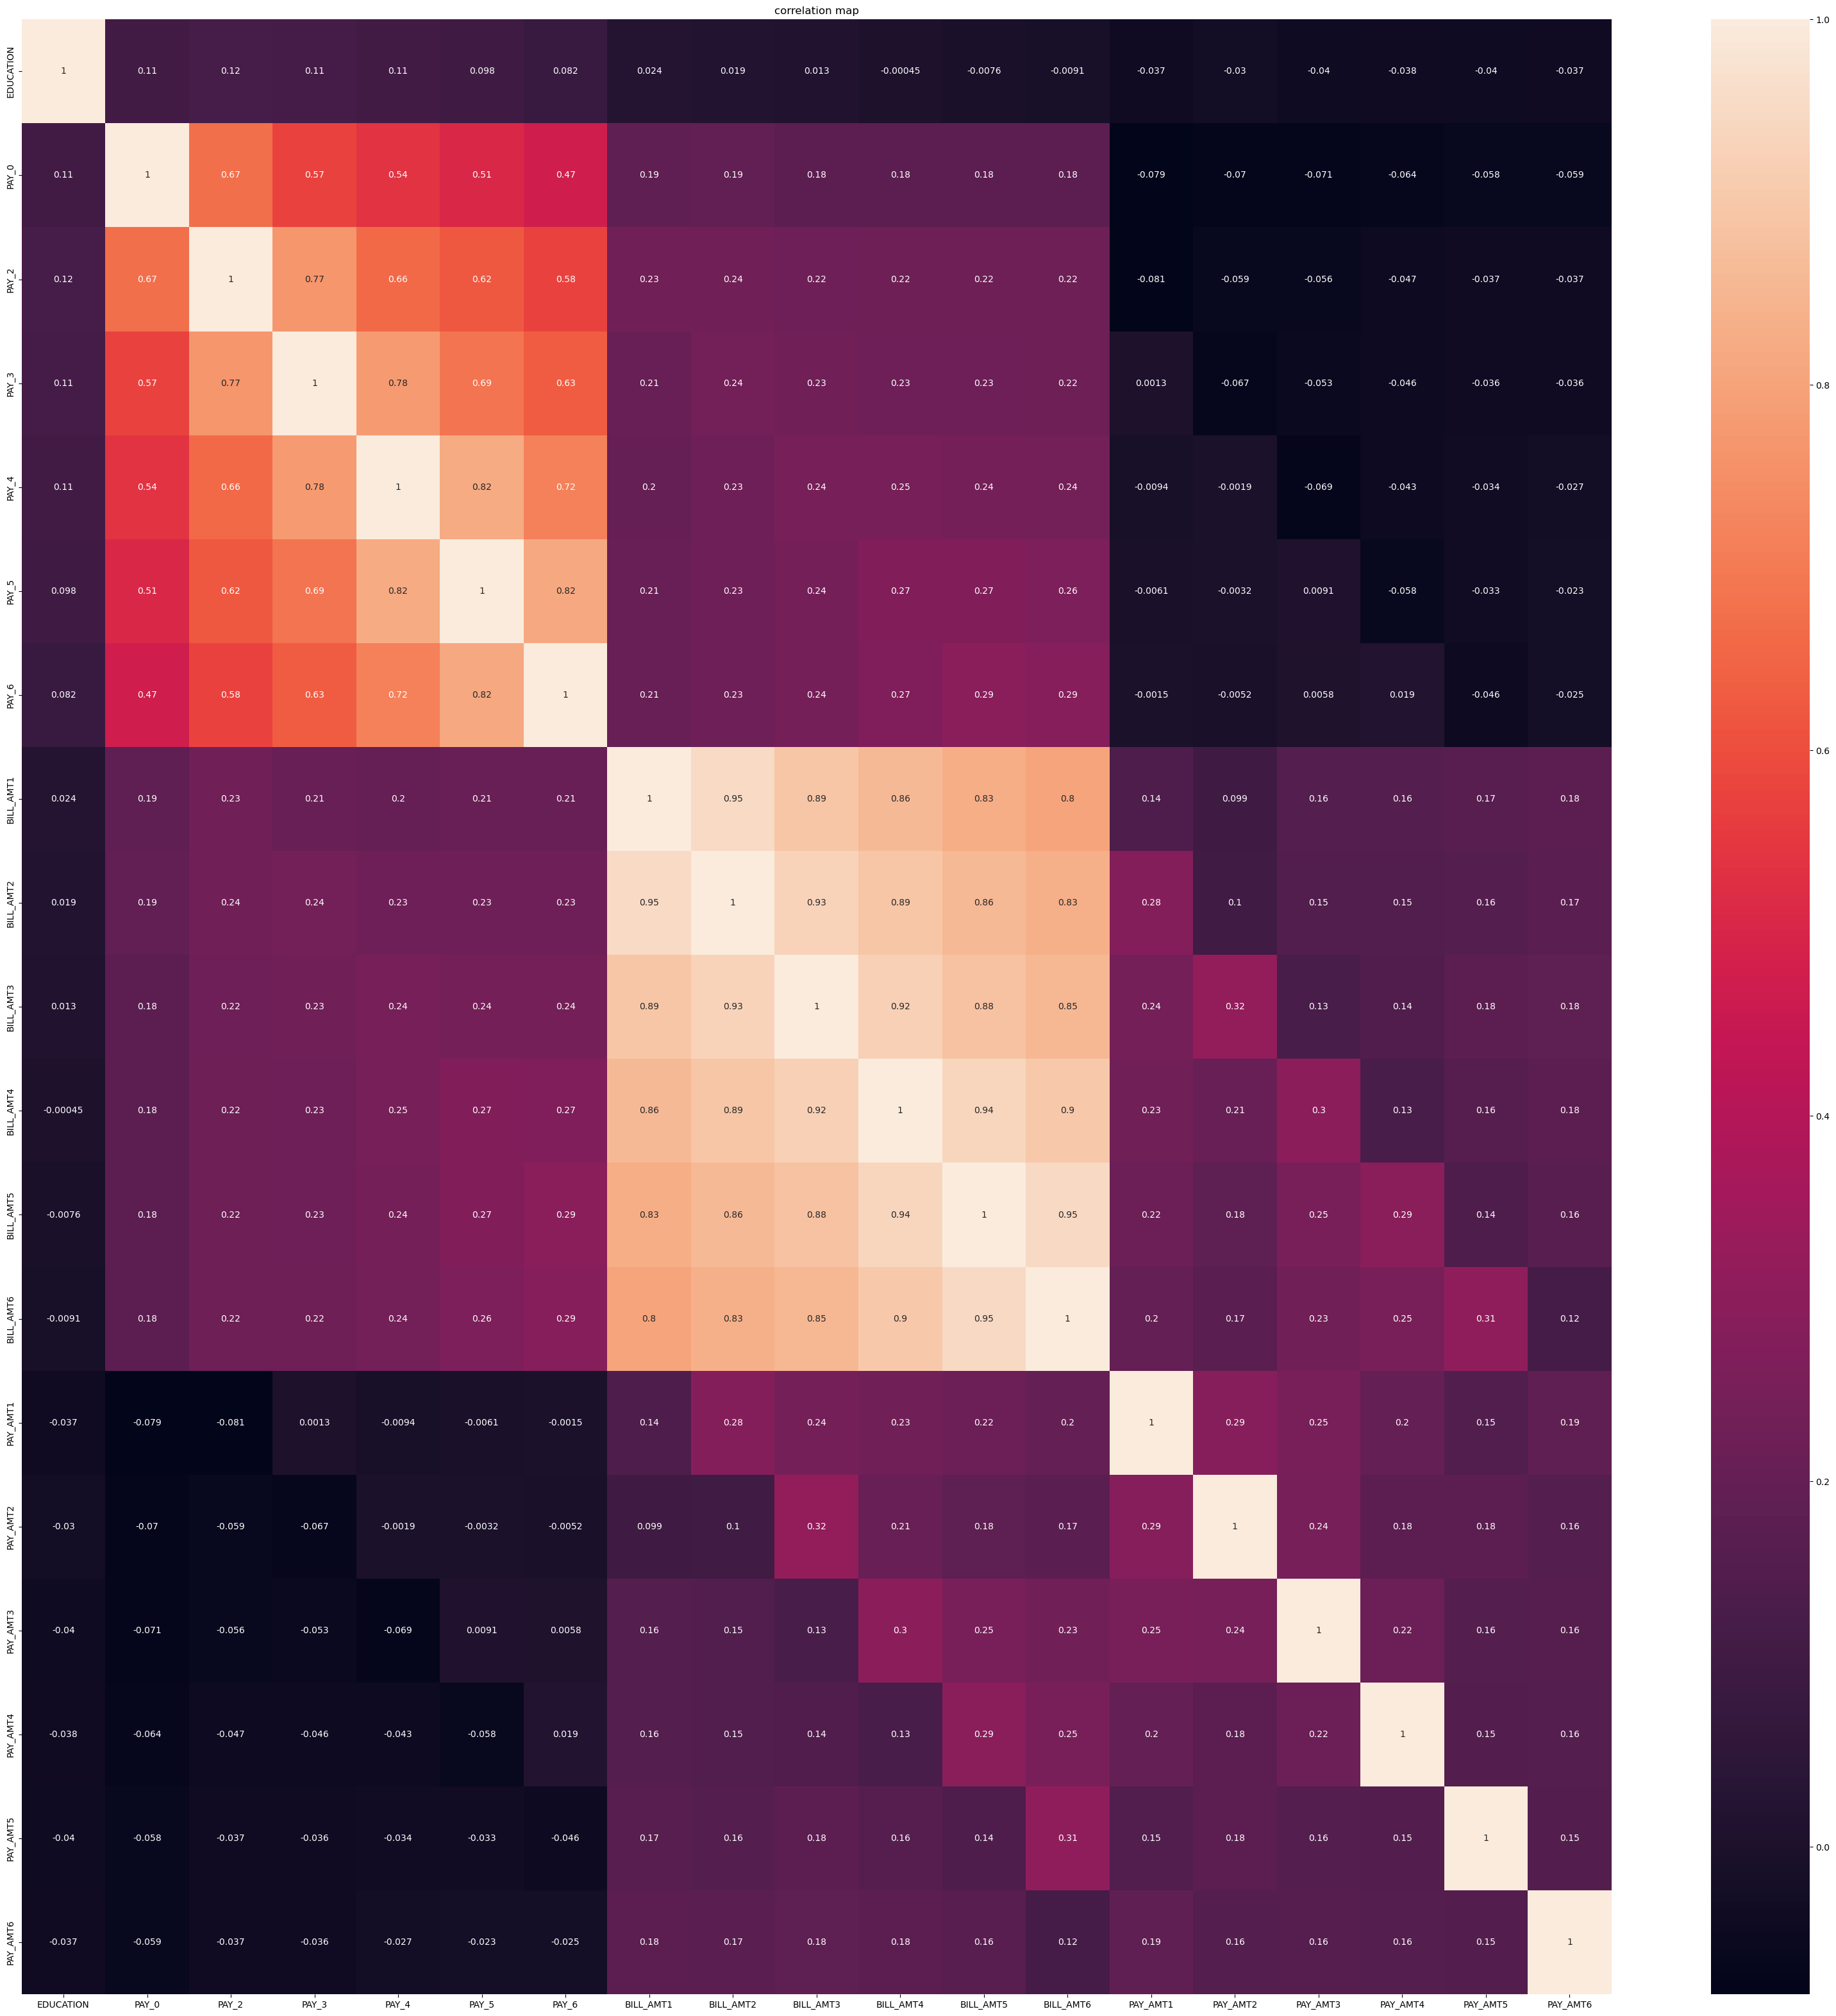

In [6]:
dat1 = dat.drop(['LIMIT_BAL','SEX','MARRIAGE','ID','AGE','default payment next month'], axis = 1)
corr = dat1.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True)
plt.title('correlation map')
plt.show()

Age_Group
0-5         0
5-10        0
10-15       0
15-20       0
20-25    3871
25-30    7142
30-35    5796
35-40    4917
40-45    3605
45-50    2400
50-55    1425
55-60     572
60-65     186
65-70      71
70+        15
dtype: int64


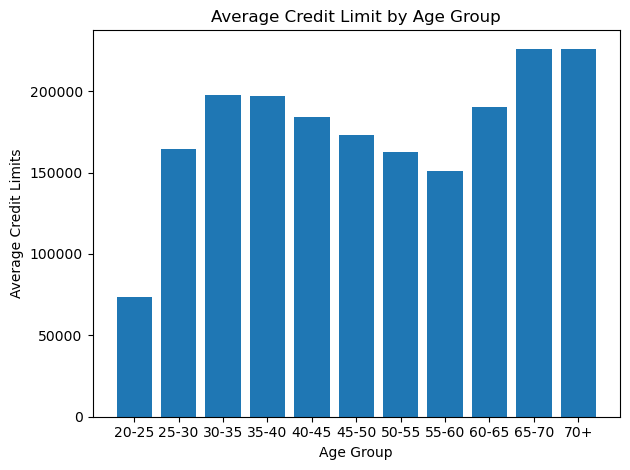

In [7]:
# grouping to see the relation between age group and credit limits
gp = dat['AGE']
    
unique_values = set(gp)
count = len(unique_values)

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70+']


dat['Age_Group'] = pd.cut(dat['AGE'], bins=bins, labels=labels)

grouped1 = dat.groupby('Age_Group')
aggregated = grouped1.size()


print(aggregated)

grouped = dat.groupby('Age_Group')['LIMIT_BAL'].mean()
plt.bar(labels, grouped)

plt.xlabel('Age Group')
plt.ylabel('Average Credit Limits')
plt.title('Average Credit Limit by Age Group')
plt.tight_layout()

plt.show()




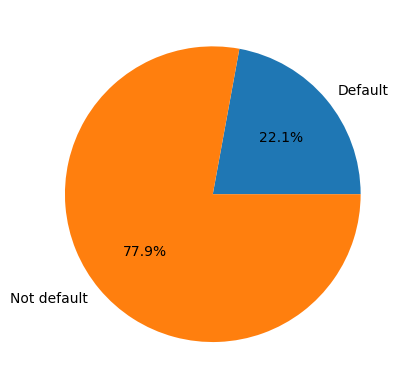

In [8]:
# Pie chart to get the percentage of default and not default
Zeros = dat['default payment next month']
num_zeros = (Zeros == 0).sum()
num_ones = (Zeros == 1).sum()
labels = ['Default','Not default']
counts = [num_ones,num_zeros]
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

([<matplotlib.axis.XTick at 0x27575d201c0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

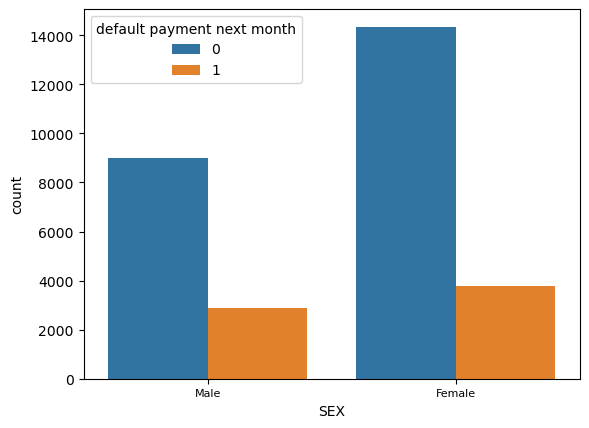

In [9]:
# Bar chart to see relation between SEX and default & non default count
sns.countplot(data=dat, x='SEX',hue = 'default payment next month')
plt.xticks([0,1],['Male', 'Female'], fontsize = 8)

([<matplotlib.axis.XTick at 0x27575d92580>,
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Divorce')])

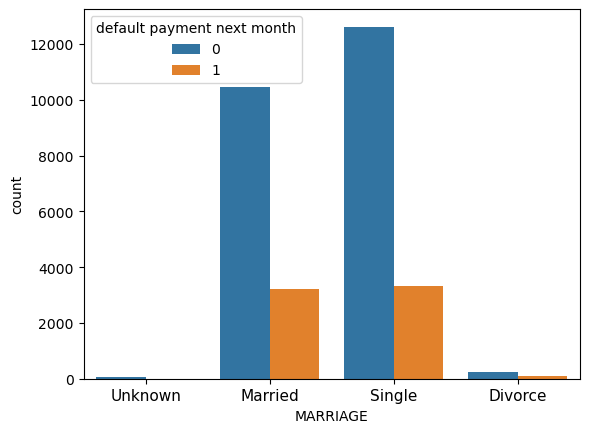

In [10]:
# Bar chart to see the realtion between mairrage statues and default & non default count
sns.countplot(data=dat, x='MARRIAGE',hue = 'default payment next month')
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

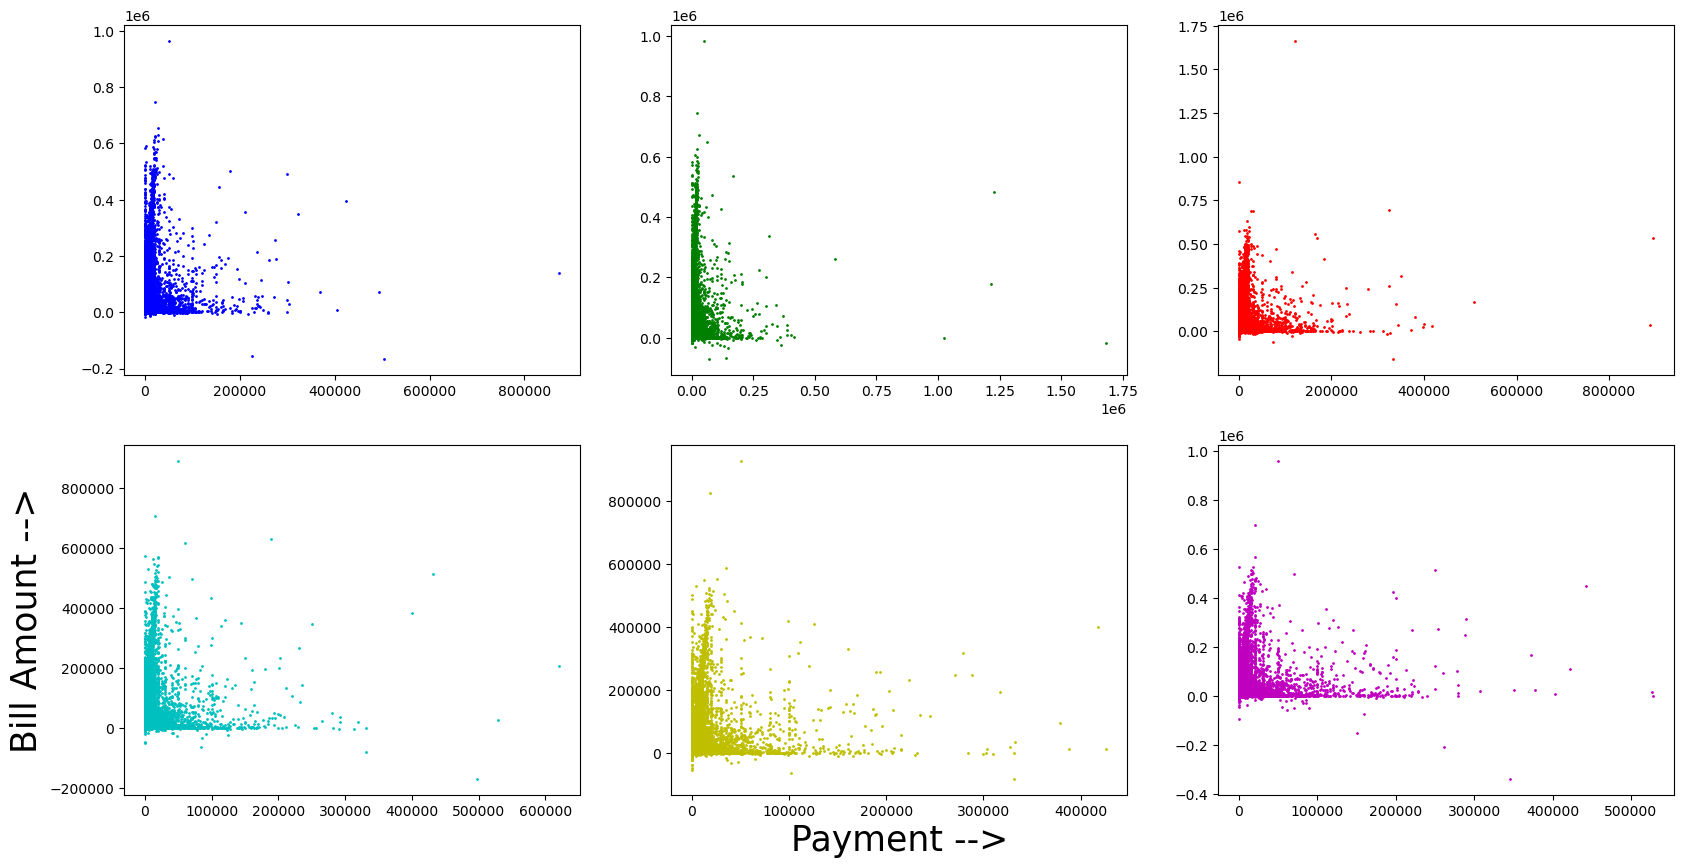

In [11]:
#scatter plot to see the relation between Bill amount and Payment
X1 = dat['PAY_AMT1']
Y1 = dat['BILL_AMT1']
X2 = dat['PAY_AMT2']
Y2 = dat['BILL_AMT2']
X3 = dat['PAY_AMT3']
Y3 = dat['BILL_AMT3']
X4 = dat['PAY_AMT4']
Y4 = dat['BILL_AMT4']
X5 = dat['PAY_AMT5']
Y5 = dat['BILL_AMT5']
X6 = dat['PAY_AMT6']
Y6 = dat['BILL_AMT6']

plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=X1, y=Y1, c='b', s=1)

plt.subplot(232)
plt.scatter(x=X2, y=Y2, c='g', s=1)

plt.subplot(233)
plt.scatter(x=X3, y=Y3, c='r', s=1)

plt.subplot(234)
plt.scatter(x=X4, y=Y4, c='c', s=1)
plt.ylabel("Bill Amount -->", fontsize=25)

plt.subplot(235)
plt.scatter(x=X5, y=Y5, c='y', s=1)
plt.xlabel("Payment -->", fontsize=25)

plt.subplot(236)
plt.scatter(x=X6, y=Y6, c='m', s=1)

plt.show()

([<matplotlib.axis.XTick at 0x2757827c580>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

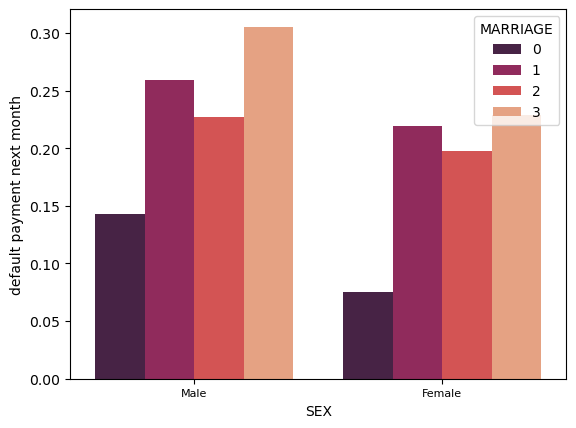

In [12]:
# bar chart to see the relation between default payment next month, MARRIAGE, and SEX
sns.barplot(x = "SEX", y = "default payment next month", hue = "MARRIAGE", data = dat, palette = 'rocket', ci = None)
plt.xticks([0,1],['Male', 'Female'], fontsize = 8)

([<matplotlib.axis.XTick at 0x27575e1ba60>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

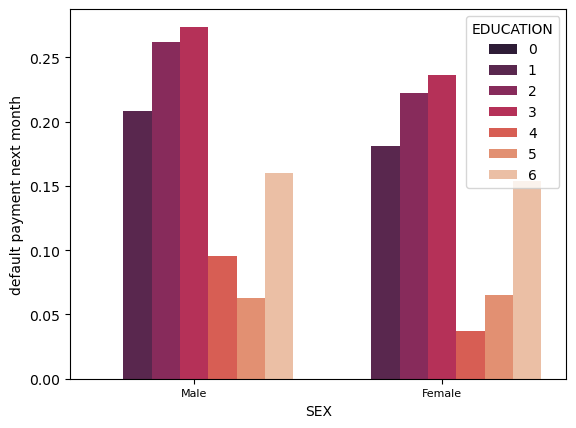

In [13]:
# bar chart to see the relation between default payment next month, Education, and SEX
sns.barplot(x = "SEX", y = "default payment next month", hue = "EDUCATION", data = dat, palette = 'rocket', ci = None)
plt.xticks([0,1],['Male', 'Female'], fontsize = 8)

# Summary stat of the data

In [14]:
#summary stat of the data
summary_stats_org = dat.describe()
summary_stats_org.drop(['SEX','MARRIAGE','AGE','ID'], axis =1)

,LIMIT_BAL,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.853133,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.790349,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Connverted the non binary data into binary

In [15]:
def concatedu(df):
    dummies = pd.get_dummies(df['EDUCATION'], prefix='EDU')
    df = pd.concat([df, dummies], axis = 1)
    return df

a = concatedu(dat)


def concatmar(df):
        dummies = pd.get_dummies(df['MARRIAGE'], prefix='MR')
        df = pd.concat([df, dummies], axis = 1)
        return df
    
b = concatmar(a)



In [16]:
def variables(df):
    df = df.copy()
    
    y = df['default payment next month'].copy()
    x = df[['LIMIT_BAL', 'SEX','MARRIAGE', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0','EDU_1', 'EDU_2','EDU_3','EDU_4','MR_0', 'MR_1', 'MR_2', 'MR_3']].copy()
 
    return y,x

y,x = variables(b)       
x = x.drop('EDUCATION', axis=1)
x = x.drop('MARRIAGE', axis=1)



# Scaled the data

In [17]:
standarize = StandardScaler()
x = pd.DataFrame(standarize.fit_transform(x), columns=x.columns)
x

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,MR_0,MR_1,MR_2,MR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.293382,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.180878,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.012122,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.237130,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.255187,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.237130,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.293382,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.119001,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.191904,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.042465,1.093780,-1.066471,-0.104326


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)
print('LogisticRegression Score',model_1.score(x_test, y_test)*100)

LogisticRegression Score 81.43333333333334


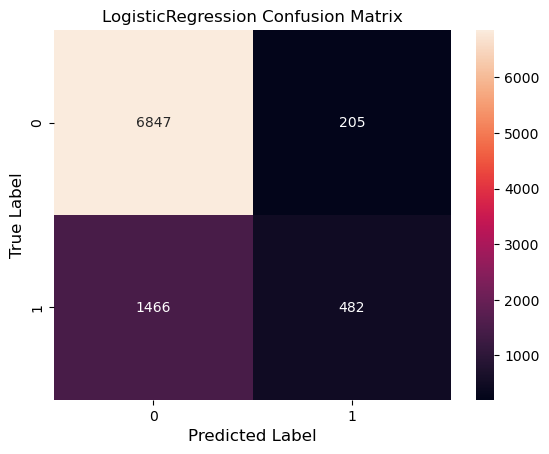

In [19]:
from sklearn import metrics
pred_rf1 = model_1.predict(x_test)

cat_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf1)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title('LogisticRegression Confusion Matrix')

plt.show()

In [20]:
print(metrics.classification_report(y_test, pred_rf1, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.70      0.25      0.37      1948

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.80      0.81      0.78      9000



# Support Vector Classifier

In [21]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)
model_2 = SVC()
model_2.fit(x_train, y_train)
print('SVC Score',model_2.score(x_test, y_test)*100)

#neural network models, Classification treee,Naive Base

SVC Score 81.97777777777779


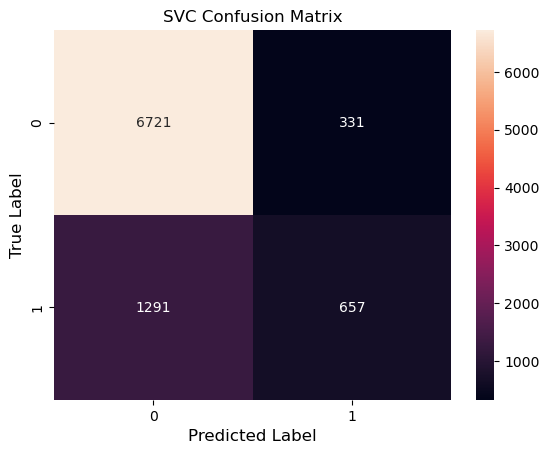

In [22]:
from sklearn import metrics
pred_rf2 = model_2.predict(x_test)

cat_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf2)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title('SVC Confusion Matrix')


plt.show()

In [23]:
print(metrics.classification_report(y_test, pred_rf2, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.34      0.45      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



# K Means model

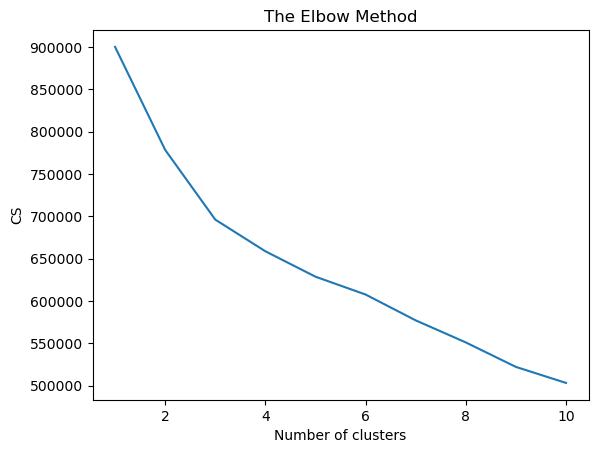

In [24]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score when we take 2 cluster: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 9300 out of 30000 samples were correctly labeled.
Accuracy score when we take 2 cluster: 0.31


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score when we take 3 cluster: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 13339 out of 30000 samples were correctly labeled.
Accuracy score when we take 3 cluster: 0.44


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score when we take 4 cluster: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 9017 out of 30000 samples were correctly labeled.
Accuracy score when we take 4 cluster: 0.30
